

# Project: Investigate TMDB movie dataset
> This project aims to investigate a collection of movies gathered from the movie database **(TMDB)**. Intended tools for analysis include pandas, numpy, seaborn and matplotlib packages. Below is the table of content:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> As mentioned earlier, the dataset I would be working with is titled the movie database comprising of **10866 samples and 21 features**. These features are:
                    <ul>
                    <li> id</li>
                    <li>imdb_id</li> 
                    <li>popularity</li>
                    <li>budget</li> 
                    <li>revenue</li>
                    <li>original_title</li>
                    <li> cast </li>
                    <li>homepage</li>
                    <li>director</li>
                    <li>tagline</li>
                    <li>keywords</li>
                    <li>overview</li>
                    <li>runtime</li>
                    <li>genres</li>
                    <li>production_companies</li>
                    <li>release_date</li>
                    <li>vote_count</li>
                    <li>vote_average</li>
                    <li>release_year</li>
                    <li>budget_adj</li>
                    <li>revenue_adj</li>
                    </ul>
> Using the data contained in these features listed above, I intend to answer these questions:
                    <ol>
                    <li>Top 10 movie with the biggest fan base?</li>
                    <li>Which movie has the biggest profit?</li>
                    <li>Movie genre with the longest cummulative runtime?</li> 
                    <li>Most frequent star cast in yearly top 10 grossing movie?</li>
                    <li>Least grossing movie? </li>
                    </ol>

In [2]:
# import necessary packages for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we are going to access our data, find out irregularities if any eg. NAN, wrong column type, etc. and fix them. In other words, lets try and clean up our data.

### General Properties

In [3]:
# Load the tmdb data
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#preview of the first five samples
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#preview the last five rows of the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

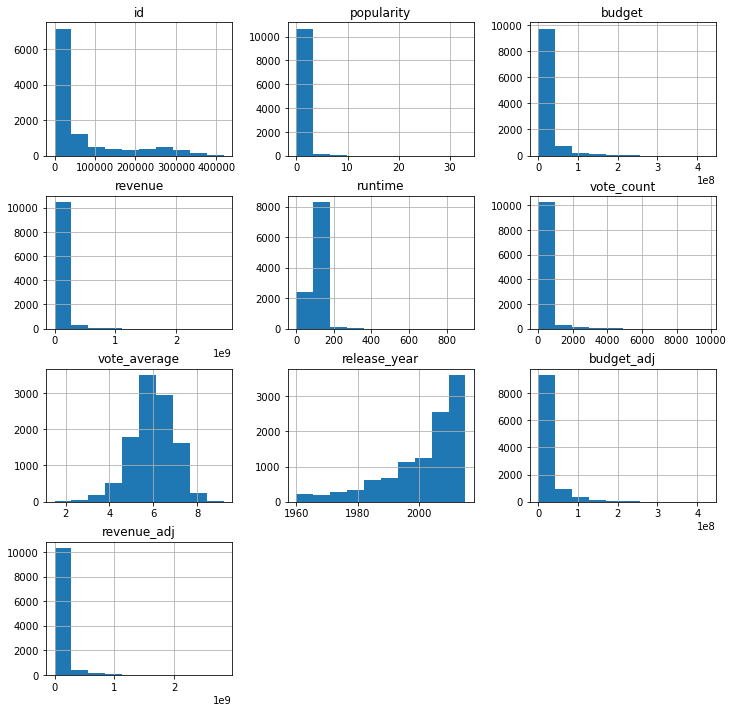

In [8]:
df.hist(figsize=(12,12));

### Data Cleaning
> From the preview, I noticed that homepage, tagline, imdb_id, keywords, overview columns are not necessary for my analysis. Lets drop them. We will also be dropping duplicate samples and filling revenue and budget column with their respective mean value.

In [9]:
#remove unwanted columns
columns_to_drop = ['homepage', 'tagline', 'imdb_id', 'keywords', 'overview' ]
df.drop(columns_to_drop, axis = 1, inplace = True) 

In [10]:
#check the shape of the data
df.shape

(10866, 16)

In [11]:
# check for duplicated samples and drop them
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [12]:
# Check for Null Values
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# fill revenue and budget with their respective mean
df[['revenue', 'budget']] = df[['revenue', 'budget']].fillna(df[['revenue', 'budget']].mean())

> Having filled the samples with Nan value in revenue and budget column with their respective mean, lets look at the samples with nan values in the cast column and drop them too. This is due to the fact that filling them with any other value will lead to false results

In [14]:
#drop samples with NA values in the listed columns
df.dropna(subset = ["cast"], inplace=True)

In [15]:
#check the final shape of df
df.shape

(10789, 16)

> Final step of data wrangling is to change the types of revenue, budget and release_year column

In [16]:
# change the types of revenue_ad, budget_adj and release_date
df['revenue_adj'] = df['revenue_adj'].apply(np.int64)
df['budget_adj'] = df['budget_adj'].apply(np.int64)
df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

> Now lets attempt to answer the questions posed earlier



### Question 1: Top 10 movie with the biggest fanbase?
> For any movie to be deemed successful, it requires a certain level of fanbase because those cinema tickets wont buy themselves nor will those social media comments be magically made. These actions and many more are usually carried out by fans thereby making the movie more popular and increasing revenue


,vote_count
original_title,
Inception,9767
The Avengers,9024
Avatar,8458
The Dark Knight,8432
Django Unchained,7375
The Hunger Games,7080
Iron Man 3,6882
The Dark Knight Rises,6723
Interstellar,6498


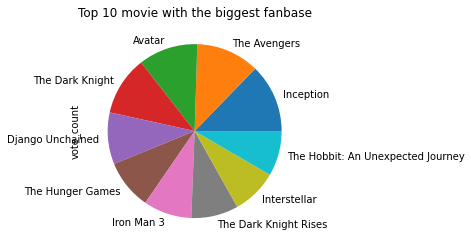

In [17]:
#Get the max value
# df.groupby(['popularity', 'vote_count']).max().sort_values(by=['popularity', 'vote_count'], ascending=False).iloc[0]
df_biggest_fanbase = df.groupby(['original_title'])['vote_count'].sum().sort_values(ascending=False)
plt.title('Top 10 movie with the biggest fanbase')
df_biggest_fanbase.iloc[:10].plot(kind='pie');
pd.DataFrame(df_biggest_fanbase[:10])

> From the table above, the movie titled inception seems to have the biggest fan base. The pie chart depicts the proportion of these 10 movies based on the summation of their vote count. 

### Question 2: Which movie has the biggest profit?
> At the end of the day, every venture requires profit to sustain itself. To get the profit made by these movies, we'd substract the budget adustment from the revenue adustment

In [18]:
# To get the profit, substract budget amount from revenue
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [19]:
df[df['profit'] == df['profit'].max()].iloc[0]

id                                                                     11
popularity                                                      12.037933
budget                                                           11000000
revenue                                                         775398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                          

> The movie with the highest profit is Star wars

### Question 3: Movie genre with the longest cummulative runtime?
> Over the years, movie runtime seem to be declining with few exceptions like marvel movies. Lets discover based on analysis which genre has the highest runtime over the years

In [20]:
# function declaration
def split_and_explode(dataframe, column, sep):
    """
    column and sep must be in string format
    """
    df = dataframe.copy()
    df[column] = df[column].str.split(sep)
    df = df.explode(column)
    return df

In [21]:
df_genre = split_and_explode(df, 'genres', '|')

,runtime
genres,
Drama,525551
Comedy,366706
Thriller,299950
Action,250062
Romance,182998
Adventure,156114
Horror,154573
Crime,144766
Science Fiction,122175


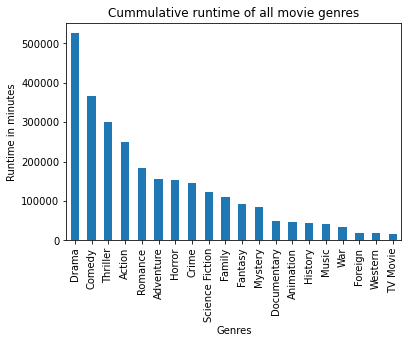

In [22]:
# Plot the Graph
runtime_summation = df_genre.groupby('genres').runtime.sum().sort_values(ascending=False)
runtime_summation.plot.bar(title = 'Cummulative runtime of all movie genres', xlabel='Genres',ylabel='Runtime in minutes');
pd.DataFrame(runtime_summation)

> Since the runtime summation was sorted in decending order, the drama genre with a value of 200702 cummulative runtime was plotted followed closely by Comedy with a cummulative runtime value of 135789.

### Question 4: Most Frequent star cast in top 10 grossing movies?
> Part of indicators as to how a movie would fare in the market lies in the cast. Many people tend to watch a particular movie if their favourite actor/actress is in it. Production companies therefore make similar researches like the one below to ensure they get the right cast.

In [23]:
Top_grossing_movies = df.sort_values(by='profit', ascending=False).iloc[:10,:]
Top_grossing_movies = split_and_explode(Top_grossing_movies, 'cast', '|')

In [24]:
# Convert dataframe to dict 
cast_dictionary = dict(Top_grossing_movies['cast'].value_counts())

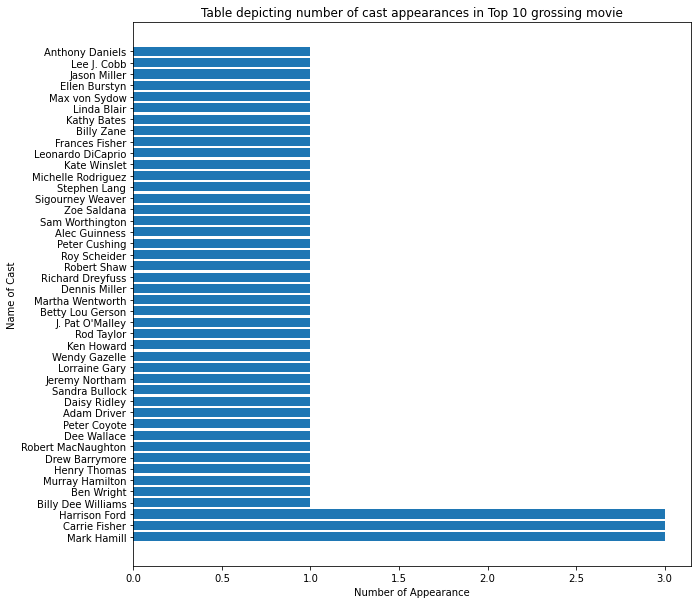

In [25]:
# Plot data
cast_name = list(cast_dictionary.keys())
number_of_appearance = list(cast_dictionary.values())
plt.figure(figsize=(10,10))
plt.title('Table depicting number of cast appearances in Top 10 grossing movie')
plt.xlabel('Number of Appearance')
plt.ylabel('Name of Cast')
plt.barh(range(len(cast_dictionary)), number_of_appearance, tick_label=cast_name)
plt.show()

> The horizontal bar chart above depicts Harrison Ford, Carrie Fisher and Mark Hamill as having the highest number of appearance in top 10 grossing movies over the years with a value of 3. 

### Question 5: Least grossing movie?
> Like all businesses in existence, the road to success is not always rosy. Sometimes, movies spend more than they make. This can be due to a number of reasons eg type of cast, story line, targeted audience, period of release, etc. In the analysis below, we will find out the least profitable movie by taking the min of profit column.

In [26]:
# Get the min profit
df[df['profit'] == df['profit'].min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431


> The movie titled **The Warrior's Way** is the least grossing movie. It made a loss of $413,912,431. 

<a id='conclusions'></a>
## Conclusions

> The major snag faced during this analysis was figuring out how to handle missing values. There was also the issue of some columns being in pipe seperated json format. We had to use the split function where necessary to resolve this. The number of samples used is 10789 with 16 features which a good amount. Initial approach to remove NA values turned out to less efficient since most of the samples were affected. The method we finally employed was to fill the missing column values with their respective mean. The effect of filling the columns especially revenue and budget with mean values was mitigated by the provision of adjustment columns which gave a more accurate value of the profit made by these movies. 

> In summary, We posed five questions and through our analysis found out that The movie titled The Warrior's Way is the least grossing movie. Harrison Ford, Carrie Fisher and Mark Hamill have the highest number of appearance in top 10 grossing movies over the years. Drama genre has the highest runtime. Star wars made the biggest buck while inception is loved by most. 




## References
https://www.statology.org/pandas-fillna-with-mean/ <br>
https://www.w3schools.com/python/ref_string_split.asp <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html